In [51]:
import warnings
warnings.filterwarnings('ignore')
import keras
import matplotlib.pyplot as plt # for plotting
import os 
import cv2 
import numpy as np
from keras.layers import Conv2D, Activation, MaxPool2D, Dense, Flatten, Dropout

In [55]:
CATEGORIES = ["01_palm", '02_l','03_fist','04_fist_moved','05_thumb','06_index','07_ok','08_palm_moved','09_c','10_down']
IMG_SIZE = 50
data_path = r"C:\Users\palak\Downloads\archive (30)\leapGestRecog\leapGestRecog"


In [56]:
image_data = []
for dr in os.listdir(data_path):
    for category in CATEGORIES:
        class_index = CATEGORIES.index(category)
        path = os.path.join(data_path, dr, category)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                image_data.append([cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE)), class_index])
            except Exception as e:
                pass
image_data[0]

[array([[5, 4, 4, ..., 3, 4, 2],
        [5, 4, 5, ..., 3, 3, 3],
        [4, 5, 4, ..., 4, 5, 3],
        ...,
        [4, 5, 5, ..., 5, 5, 5],
        [5, 5, 6, ..., 5, 7, 4],
        [4, 7, 5, ..., 5, 4, 4]], dtype=uint8),
 0]

In [57]:
import random
random.shuffle(image_data)

In [58]:
input_data = []
label = []
for X, y in image_data:
    input_data.append(X)
    label.append(y)

In [59]:
label[:10]

[9, 2, 9, 5, 1, 7, 5, 8, 4, 1]

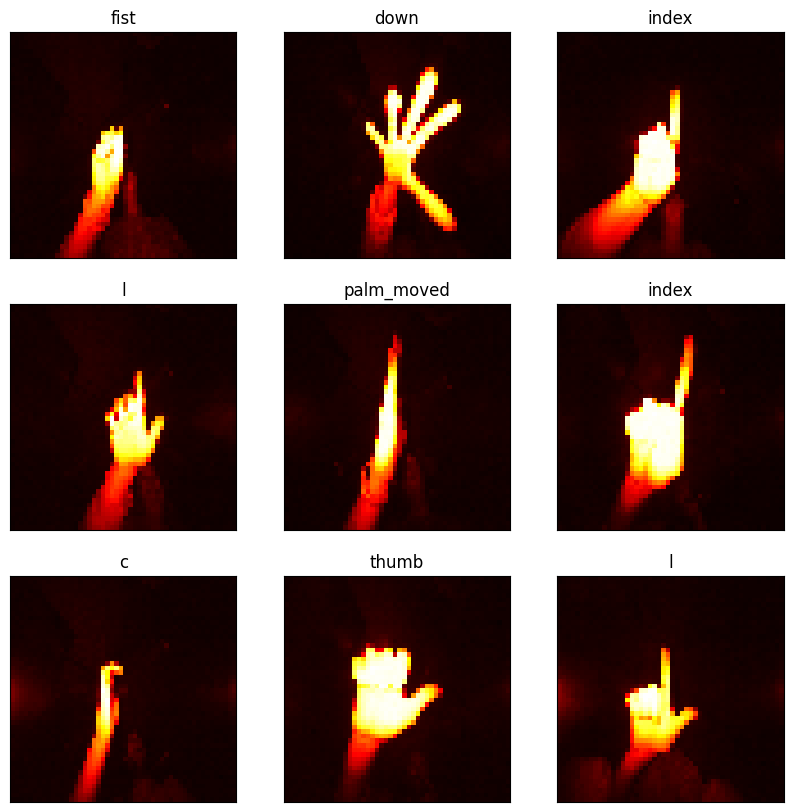

In [60]:
plt.figure(1, figsize=(10,10))
for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(image_data[i][0], cmap='hot')
    plt.xticks([])
    plt.yticks([])
    plt.title(CATEGORIES[label[i]][3:])
plt.show()

In [61]:
input_data = np.array(input_data)
label = np.array(label)
input_data = input_data/255.0
input_data.shape


(20000, 50, 50)

In [63]:
import numpy as np
from keras.utils import to_categorical

# Assuming label is already defined
label = to_categorical(label, num_classes=10)

# Convert label array to the desired data type
label = label.astype('int8')  # or 'int16', 'int32', etc. as needed


In [64]:
input_data.shape = (-1, IMG_SIZE, IMG_SIZE, 1)

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_data, label, test_size = 0.3, random_state=0)

In [66]:
model = keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1)))
model.add(Activation('relu'))


model.add(Conv2D(filters = 32, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3)))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

In [67]:
model.fit(X_train, y_train, epochs = 7, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.7157 - loss: 0.8326 - val_accuracy: 0.9970 - val_loss: 0.0104
Epoch 2/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 80ms/step - accuracy: 0.9928 - loss: 0.0198 - val_accuracy: 0.9597 - val_loss: 0.2361
Epoch 3/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 34s 78ms/step - accuracy: 0.9969 - loss: 0.0182 - val_accuracy: 0.9988 - val_loss: 0.0036
Epoch 4/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9984 - loss: 0.0053 - val_accuracy: 0.9997 - val_loss: 0.0014
Epoch 5/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9995 - val_loss: 0.0032
Epoch 6/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9989 - loss: 0.0037 - val_accuracy: 0.9998 - val_loss: 3.0048e-04
Epoch 7/7
438/438 ━━━━━━━━━━━━━━━━━━━━ 35s 79ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0021


In [68]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 46, 46, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 21, 21, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,338,582 (12.74 MB)

 Trainable params: 1,669,290 (6.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,669,292 (6.37 MB)

In [69]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print('Test accuracy: {:2.2f}%'.format(test_accuracy*100))

188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9987 - loss: 0.0041
Test accuracy: 99.93%


188/188 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step


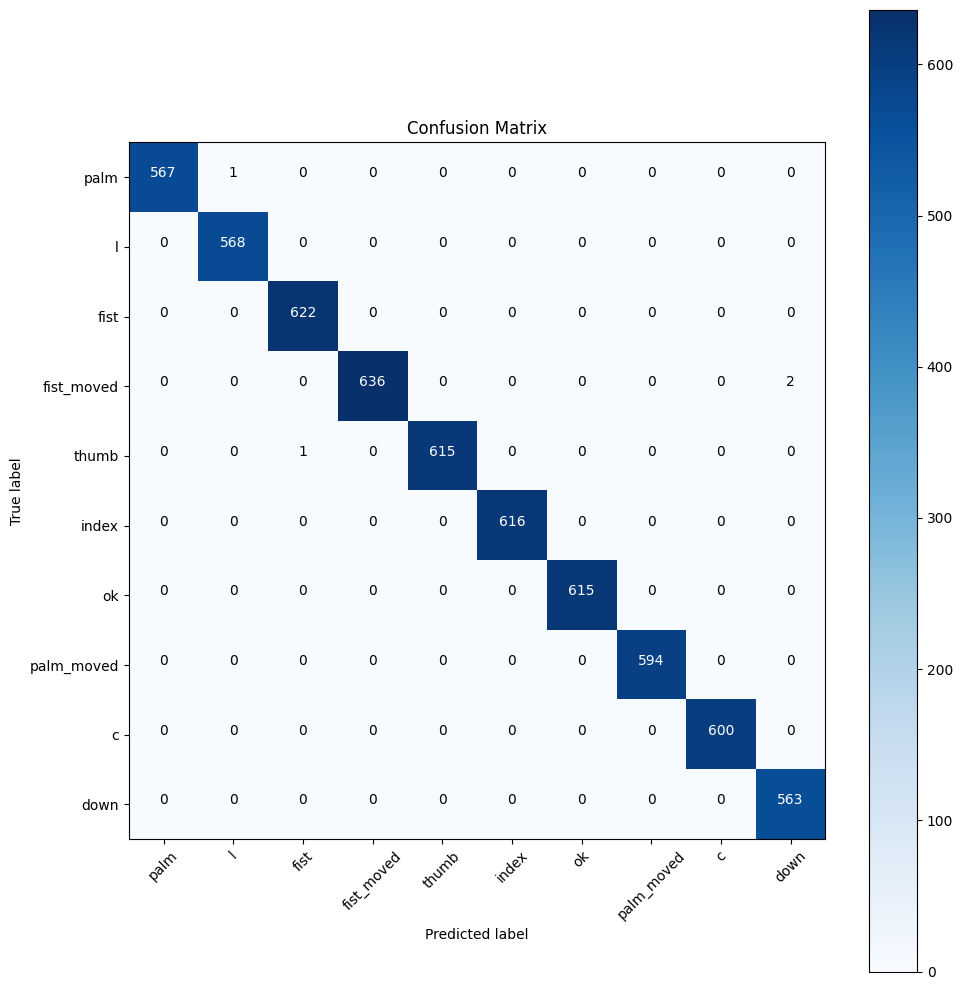

In [71]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

cat = [c[3:] for c in CATEGORIES]
cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(model.predict(X_test), axis=1))

plt.figure(figsize=(10,10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(cat))
plt.xticks(tick_marks, cat, rotation=45)
plt.yticks(tick_marks, cat)

fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()
